In [1]:
from sys import path
import yaml
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

path.append("../src/")

from utils import format_messages
from subagents.topic_clarifier import DefineResearchTopic

# compilation config
checkpointer = InMemorySaver()
compile_config = {'checkpointer': checkpointer}

# llm config
llm_config = yaml.safe_load(open("../config/llm.yaml", "rb"))

# app
app = DefineResearchTopic(
    llm_config=llm_config.get("scope"),
    compile_config=compile_config
)

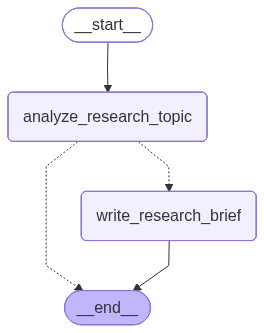

In [2]:
from IPython.display import Image, display

display(Image(app.compiled_graph.get_graph(xray=True).draw_mermaid_png()))

In [3]:
config = {"configurable": {"thread_id": "scoping-session-1"}}
result = app.invoke(
    input={"messages": [
        HumanMessage(content="I want to research the best coffee shops")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to research the best coffee shops                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ {"is_topic_clarified": false, "question": "What specific criteria are you looking for in the best coffee shops? │
│ For example, are you interested in location, ambiance, menu variety, or customer reviews?"}                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [4]:
result = app.invoke(
    {"messages": [
        HumanMessage(content="Coffe shops in San Francisco. The criteria should be the best customer reviews attending to coffe quality")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to research the best coffee shops                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ {"is_topic_clarified": false, "question": "What specific criteria are you looking for in the best coffee shops? │
│ For example, are you interested in location, ambiance, menu variety, or customer reviews?"}                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Coffe shops in San Francisco. The criteria should be the best customer reviews attending to coffe quality       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ {"is_topic_clarified": true, "question": ""}                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ {"title": "What are the top-rated coffee shops in San Francisco based on customer reviews, specifically         │
│ focusing on the quality of coffee, and what factors contribute to their high ratings?"}                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯